In [ ]:
url="https://raw.githubusercontent.com/Ashutoshrx/Machine-Learning/master/data/Train.csv"

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [ ]:
raw_data= pd.read_csv(url)
raw_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
raw_data.shape

(614, 13)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
raw_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
raw_data.isna().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#data cleaning
#Handling missing values by  replacing them to the mean
raw_data['Gender'] = raw_data['Gender'].fillna(raw_data['Gender'].value_counts().index[0])
raw_data['Married'] = raw_data['Married'].fillna(raw_data['Married'].value_counts().index[0])
raw_data['Dependents']=raw_data['Dependents'].fillna(raw_data['Dependents'].value_counts().index[0])
raw_data['Self_Employed']=raw_data['Self_Employed'].fillna(raw_data['Self_Employed'].value_counts().index[0])

raw_data['LoanAmount'] = raw_data['LoanAmount'].fillna(raw_data['LoanAmount'].mean())
raw_data['Loan_Amount_Term']=raw_data['Loan_Amount_Term'].fillna(raw_data['Loan_Amount_Term'].mean())
raw_data['Credit_History']=raw_data['Credit_History'].fillna(raw_data['Credit_History'].mean())

In [ ]:
raw_data.isna().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#handling the categorical records
#get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables
raw_data['Gender']=pd.get_dummies(raw_data['Gender'])
raw_data['Married']=pd.get_dummies(raw_data['Married'])
raw_data['Dependents']=pd.get_dummies(raw_data['Dependents'])
raw_data['Education']=pd.get_dummies(raw_data['Education'])
raw_data['Self_Employed']=pd.get_dummies(raw_data['Self_Employed'])
raw_data['Property_Area']=pd.get_dummies(raw_data['Property_Area'])
raw_data['Loan_Status']=pd.get_dummies(raw_data['Loan_Status'])

In [ ]:
#Male is converted to 1, female to 0 and etc.
raw_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,1,1,1,5849,0.0,146.412162,360.0,1.0,0,0
1,LP001003,0,0,0,1,1,4583,1508.0,128.000000,360.0,1.0,1,1
2,LP001005,0,0,1,1,0,3000,0.0,66.000000,360.0,1.0,0,0
3,LP001006,0,0,1,0,1,2583,2358.0,120.000000,360.0,1.0,0,0
4,LP001008,0,1,1,1,1,6000,0.0,141.000000,360.0,1.0,0,0


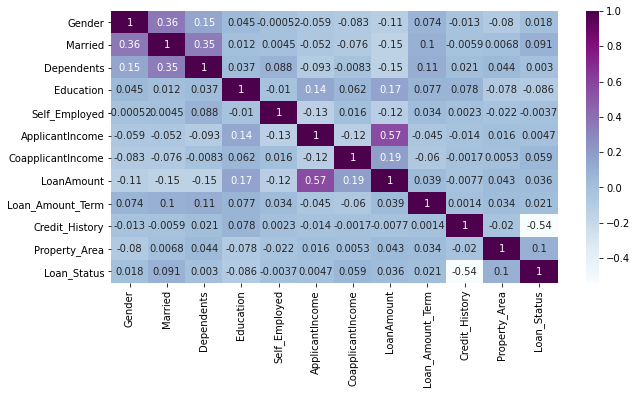

In [ ]:
corrmat = raw_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))
#plot heat mapr
sns.heatmap(raw_data[top_corr_features].corr(),annot=True,cmap="BuPu")

In [ ]:
#Dropping columns that are not required
traindata=raw_data.drop('Loan_ID',axis=1)
x=traindata.drop('Loan_Status',axis=1)
#target class
y=traindata['Loan_Status']
#

In [ ]:
x.shape

(614, 11)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=42)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#x=sc.fit(x)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=19,metric='minkowski')
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test ,y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print()
print('KNN accuracy score in %: ', accuracy_score(y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.75      0.99      0.85       133
           1       0.97      0.39      0.55        72

    accuracy                           0.78       205
   macro avg       0.86      0.69      0.70       205
weighted avg       0.83      0.78      0.75       205

Confusion Matrix: 
 [[132   1]
 [ 44  28]]

KNN accuracy score in %:  78.04878048780488
